Population - universal set. The whole set of a given type.
Sample- subset of the population

Descriptive Statistics- 1. Measures of Central Tendency- mean, mode, median

                         2. Measure of Spread -Standard deviation and absolute deviation
                         
                         3. Visualizations - histogram, boxplot

In population they are referred to as POPULATION STATISTICS

In sample they are referred to as - POINT ESTIMATES

N - no of individuals in a population

n- no of individuals in a sample

mu (u)- population mean

x - sample mean
sigma - population std
s - sample std


In [1]:
population_mean = df.Age.mean()
population_mean #get the mean of the population

#sample mean
sample_mean = df.sample(n=50, random_state=20).Age.mean() #random_state=20 is used to get the same sample every time I run the code
sample_mean

#for five samples
sample_means = []
for i in range(5):
    sample = df.sample(n=50, random_state=i)
    sample_means.append(sample.Age.mean()) #get the mean of each sample
    #random_state here is used to get the same sample every time I run the code

#And we can calculate the errors again:
five_sample_errors = [np.abs(sample_mean-population_mean)/population_mean for sample_mean in sample_means]
five_sample_errors

#for 10,000 Samples
sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i)
    sample_means.append(sample.Age.mean())
    
len(sample_means)
#output 10,000
 #draw a histogram of the sample means
plt.subplots(figsize=(10, 6))
plt.hist(sample_means, bins=100)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.axvline(population_mean, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram of Sample Means')
plt.show()


NameError: name 'df' is not defined

# Common Distributions 
## DISCRETE DISTRIBUTIONS
- Uniform distribution- example- dice. There are 6 possible outcomes and each shares the same probability of occurrence.
- Bernoulli Distribution- eg. coin toss. There's a 50 50 chance of either the head, tail occurring
- Poisson Distribution - eg. mail. If your overall mail received is constant, the number of items received on a single day (or month) follows a Poisson distribution. Other examples might include visitors to a website, or customers arriving at a store, or clients waiting to be served in a queue.

## CONTINUOS DISTRIBUTIONS
- The Normal or Gaussian Distribution- A normal distribution turns up very often when dealing with real-world data including heights, weights of different people, errors in some measurement or grades on a test. Our temperature example above follows a normal distribution as well!

# Probability Mass Function/ frequency function

Associates frequencies with discrete random variables
Discrete means - there is a known no of  possible outcomes. The range is countable. Eg six possible outcomes for a dice roll.
 ## Properties
 - 0<=P(x) < 1
 - E P(x) = 1 - Sum Of all probabilities of X should be equal to 1.

 - HELPS US UNDERSTAND THE DISTRIBUTION OF DATA

 ## to get the pmf of a dataframe get the value counts of a column, for each value with a value count, divide the value count by the total no of the
 values in the column


In [ ]:
#This means that, in order to convert any random variable's frequency into a probability, we need to perform the following steps:
#1.Get the frequency of every possible value in the dataset
#2.Divide the frequency of each value by the total number of values (length of dataset)
#3. Get the probability for each value

import collections
x= [1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4,5,5,5]
#set the counter for each value
counter = collections.Counter(x)

print(counter) # output Counter({4: 5, 3: 4, 1: 3, 2: 2})Returns a dictionary with the frequency of each value
print(len(x)) #output 14 Returns the total number of values in the dataset

#2. Divide the frequency of each value by the total number of values (length of dataset) to get the probability for each value
#dictionary comprehension
probabilities = [round(value/len(x),2)  for key,value in counter.items()] #round to 2 decimal places

print(counter.keys(), probabilities) #output dict_keys([1, 2, 3, 4]) [0.21, 0.14, 0.29, 0.36] Returns the keys and the probabilities


Counter({4: 5, 3: 4, 1: 3, 5: 3, 2: 2})
17
dict_keys([1, 2, 3, 4, 5]) [0.18, 0.12, 0.24, 0.29, 0.18]


## writing a function


In [ ]:
import collections
def p(x_i): #eg p(1)
    frequency = counter[x_i] #get the frequency of value of  1 counter[1] = 3
    total_number = len(x) #get the total number of values in the dataset
    return frequency / total_number #3/14 = 0.21

## use a bar graph to VISUALIZE PMF
- Because a PMF is designed to work with discrete (categorical) data in the first place, no binning, counting, or normalization is needed to display the probability of each possible x value.

- Histograms are typically used with continuous data to show frequencies, although they can be adapted to show similar information to PMFs. The most important thing to customize is the density=True argument, which tells the histogram to normalize the values and display probabilities rather than frequencies.


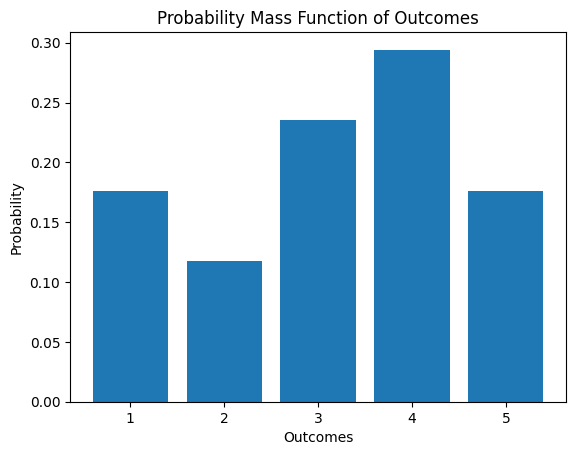

In [ ]:
#1. USING A BAR GRAPH
import matplotlib.pyplot as plt
%matplotlib inline


outcomes = counter.keys()
plt.bar(outcomes, [p(x_i) for x_i in outcomes]) #plot the bar graph
plt.title('Probability Mass Function of Outcomes')
plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.show()




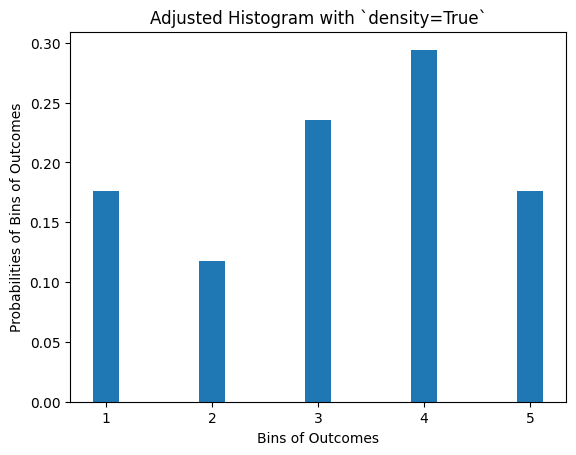

In [ ]:
#2. USING A HISTOGRAM
import numpy as np
xtick_locations = range(1,6) #set the xticks- xticks are the values on the x-axis
bins = np.arange(6)+0.5 #+0.5 is used to center the bars on the xticks
plt.hist(x, bins=bins,  rwidth=0.25, density=True) #plot the histogram
plt.xticks(ticks=xtick_locations) #set the xticks
plt.xlabel('Bins of Outcomes')
plt.ylabel('Probabilities of Bins of Outcomes')
plt.title("Adjusted Histogram with `density=True`");


## MEAN - DISCRETE DISTRIBUTIONS
Expected Value = mean(mu) =sum of (p(x)*x) for each x


In [ ]:
#dataset [2,5,5]

#getting the mean would be 2+5+5/3 = 4
#using the formula for expected value
#E(x) = x1*p(x1) + x2*p(x2) + x3*p(x3)
4 = 2*1/3 + 5*1/3 + 5*1/3 or 4 = 2*(1/3) + 5*(2/3) #1/3 is number of times 2 appears in the dataset and 2/3 is the number of times 5 appears in the dataset


## Variance - discrete distributions
 standard_deviation**2
 

In [ ]:
#Variance
#Variance is a measure of how much the values in a dataset differ from the mean.
#The formula for variance using the expected value/mean is: E(x - u)^2 = E p(x)(x - u)^2
x = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 5]
counter = collections.Counter(x)
total_number = len(x)
outcomes = counter.keys()

#mean
mu = sum([p(x_i)*x_i for x_i in outcomes])
print(mu)

#variance
variance = sum([p(x_i)*(x_i - mu)**2 for x_i in outcomes])
print(variance)



2.4615384615384617
1.940828402366864


# Probabilty Density Function - for modelling continuous random variable. Have an infinite no of variables:
- Height ->65.5,65.7 ,65.96
- Probability Density Function (PDF) helps identify the regions in the distribution where observations are more likely to occur, in other words, where the observation occurrence is more dense.
- Thus the possiblity of a value like 80.0 occurring is 0 hence the infinite values

P(a≤X≤b)=∫ab ​f(x)dx - is the formula.
- What is the probability the temperature in NYC is between 82 and 85 degrees on June 1?" -use the integral to get the area under the curve.
P(82<=X<=85) = ∫82,85  F(x)d(x) >=0

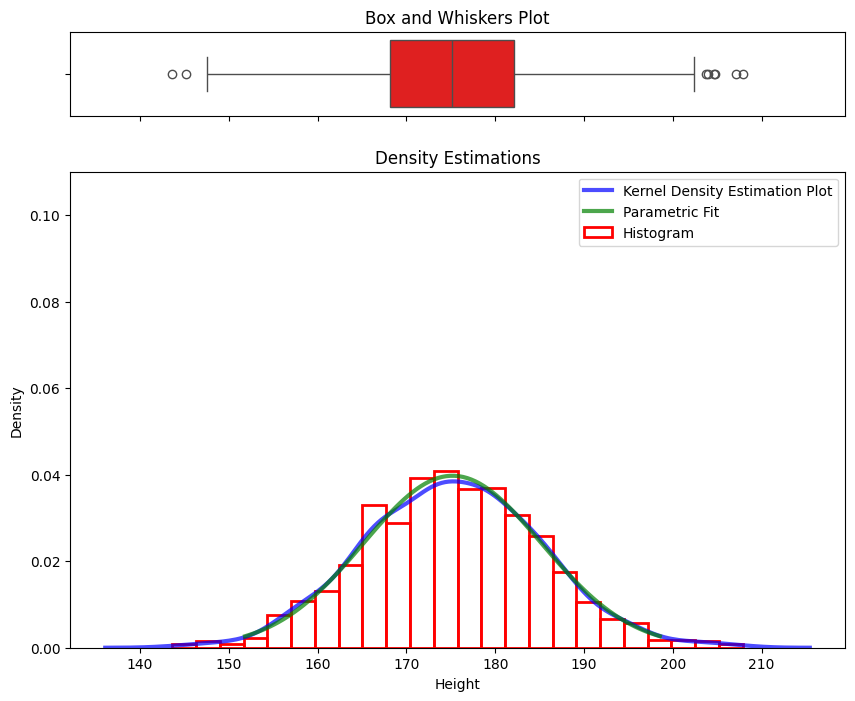

In [7]:
#visualizing the PDF using histogram and density plot
"""
Let's plot the density plot for data in the Height column using our Seaborn functions. We'll be plotting:

1.a Box and Whiskers plot
2.a histogram
3.a non-parametric Kernel Density Estimation plot
4.Parametric distribution fit plot
... all in one single go.
"""
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )
#use random height data
data = pd.DataFrame(np.random.normal(175,10,1000), columns=["Height"]) #175 is the mean and 10 is the standard deviation and 1000 is the number of samples
sns.histplot(data.Height,
             linewidth=2,
             edgecolor="r",
             alpha=0.4,
             color="w",
             label="Histogram",
             stat="density",
             ax=ax2)


sns.kdeplot(data.Height,
           linewidth=3,
           color="b",
           alpha=0.7,
           label="Kernel Density Estimation Plot",
           ax=ax2)

mean = data.Height.mean()
std = data.Height.std()
parametric_dist = stats.norm(loc=mean, scale=std)
x = np.linspace(parametric_dist.ppf(0.01), parametric_dist.ppf(0.99), 100)

ax2.plot(x,
         parametric_dist.pdf(x),
            color="g",
            alpha=0.7,
            linewidth=3,
            label="Parametric Fit")

ax2.set_title('Density Estimations')

sns.boxplot(x=data.Height, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, 0.08))
plt.ylim(0, 0.11)
plt.legend();

# CDF - CUMMULATIVE DENSITY FUNCTION

F(x) = P(X <= x)
- CDFs are smooth curves for continuous random variables, where they are "step functions" when looking at discrete random variables. 
- Can use scipy to compare both the CDF and PDF 
- r_pdf = stats.norm.rvs
- r-cdf = stats.norm.cdf


CDF - INTEGRAL OF PROBABILITY DENSITY FUNCTION- Area of coverage. Used to get the probability of values in PDF
while PDF  is used to get the probability density

In [ ]:
P(82<=X<=85) = ∫82,85  F(x)d(x) >=0
P(X<=85) - P(X<=82) = F(85) - F(82) = 0.95 - 0.6 = 0.35

r= stats.norm.cdf(85, loc=mu, scale=std) - stats.norm.cdf(82, loc=mu, scale=std) #loc is the mean and scale is the standard deviation
# the above code is used to get the probability of the random variable being between 82 and 85  given the mean and standard deviation

r = stats.norm.pdf(85, loc=mu, scale=std) - stats.norm.pdf(82, loc=mu, scale=std) #loc is the mean and scale is the standard deviation
# the above code is used to get the probability density of the random variable being between 82 and 85  given the mean and standard deviation

# both codes will give the same output but the first code gives the probability while the second code gives the probability density
r.ppf(0.95) #output 85.0. This code is used to get the value of the random variable that corresponds to the 95th percentile given the mean and standard deviation



## Question
Imagine that an online clothing business gets orders with totals that are normally distributed with an average of $95 and a standard deviation of $18. Graph the PDF and CDF for the orders for this business.

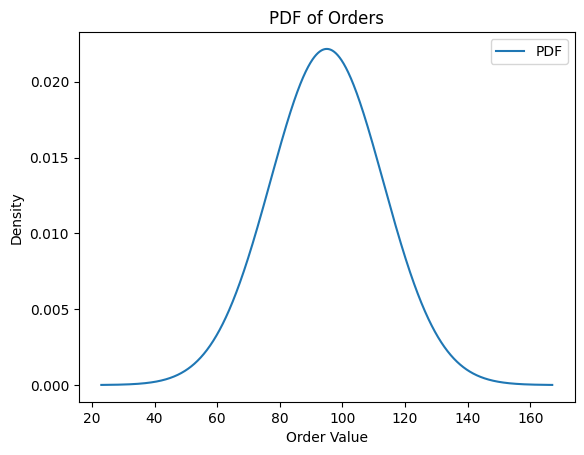

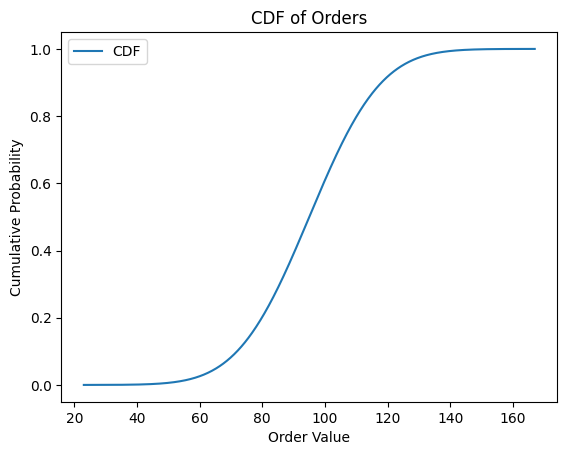

In [13]:
#mean = $95 and std = $18
#Graph PDF and CDF of the orders of this business
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
#%matplotlib.inline

mean = 95
std = 18
x = np.linspace(mean - 4*std, mean + 4*std, 1000)#get the x values. 4*std is used to get the range of the x values. The more the std, the more the x values
y = norm.pdf(x, mean, std) # get the y values for the PDF
plt.plot(x, y, label='PDF')
plt.title('PDF of Orders')
plt.xlabel('Order Value')
plt.ylabel('Density')
plt.legend()
plt.show()

#CDF
x = np.linspace(mean - 4*std, mean + 4*std, 1000)#using mean-4*std and mean+4*std so that the values will be within the range of the mean and standard deviation
y = norm.cdf(x, mean, std) #get the y values for the CDF. norm.cdf means normal cummulatve distribution function
plt.plot(x,y, label='CDF')
plt.title('CDF of Orders')
plt.xlabel('Order Value')
plt.ylabel('Cumulative Probability')
plt.legend() # add the legend. The legend is used to show the labels of the graph
plt.show()


# Normal distribution/Bell Curve/Gaussian Curve
- has 2 key parameters. Mean(mu) and std(sigma)
- The Normal Distribution is symmetrical and its mean, median and mode are equal.
- Normal distributions are symmetric around their mean
- The area under the bell curve is equal to 1.0
- Normal distributions are denser in the center and less dense in the tails
- Around 68% of the area of a normal distribution is within one standard deviation of the mean (
 to $(\mu + \sigma)$)
- Approximately 95% of the area of a normal distribution is within two standard deviations of the mean (
 to $(\mu + 2\sigma)$).
 - 99.7 % within 3 standard deviations.( to $(\mu + 3\sigma)$)

 - Empirical rule - 68,95,99.7 rule

- Values in the extreme of tails (more than 3 standard deviations) can be considered "interesting events" as their probability of occurrence is very low (1 occurrence in about ~300!). In other cases, you'll consider them as outliers due to noise or error of measurement. 

- Normal distribution is popular because?
   - 1. Even the errors that occur follow a normal distribution thus easily eradicated
   - 2. Central Limit Theorem- When you add a large number of independent random variables, irrespective of the original distribution of these variables, their sum tends towards a normal distribution.
    - 3. Can easily perform enhanced computation with randomm variables that follow a normal distribution- the resulting distribution will always be normal.
    - 4. In Python, the NumPy module provides a ton of methods to generate and inspect random variables.

       mu - 0.5,sigma = 0.1

    n = 1000 # generate 1000 samples
    
    numbers = np.random.normal(mu,sigma,n)

# Standard Normal Distribution

- the mean is 0 and std is 1
- using empirical rule of normal distribution
  - 1. 68% of the area lies in the interval of 1 st deviation from the mean. Thus, between -1 and 1
   - 2. 95% of the area lies in the interval of 2 st deviation from the mean. Thus, between -2 and 2
   - 3.  99% of the area lies in the interval of 3 st deviation from the mean. Thus, between -3 and 3

The above is when $(\mu)$ = 0 and $(\sigma)$ = 1

# Z scores - used to normalize distributions
 - z = (x - $(\mu)$)/$(\sigma)$
  where mu is the mean and standard deviation is sigma
  - Used for data standardization between two graphs.
  - The z-score can be used to understand how extreme a certain result is
  - Skewness and kurtosis can be used to measure how different a given distribution is from a normal distribution

In [ ]:
"""Imagine some test results follow a normal distribution with a mean score of 50 and a standard deviation of 10. One of the students scored a 70 on the test. Using this information and 
-scores makes it easy to tell how she performed in terms of standard deviations from the mean. Converting a test score of 70 to a 
-score, an 
 of 70 would be, in this case:
 """
z = 70 -50 / 10 #70 is the test score, 50 is the mean and 10 is the standard deviation
z #output 2.0. This means that the student scored 2 standard deviations above the mean
"""calculating the z-score gives us quick and easy access to understanding how extreme a certain result is. """

#going back to the original score
x = z*10 + 50 #10 is the standard deviation and 50 is the mean
x #output 70. This means that the student scored 70 on the test
x = z*std + mean

## Questions


1. The distribution of people's heights in the United States has a mean of 66 inches and a standard deviation of 4 inches. Calculate the z-score of a height of 76 inches.
2. Use the empirical rule and the information above to determine about how many people are between 62 inches and 74 inches.

2.5


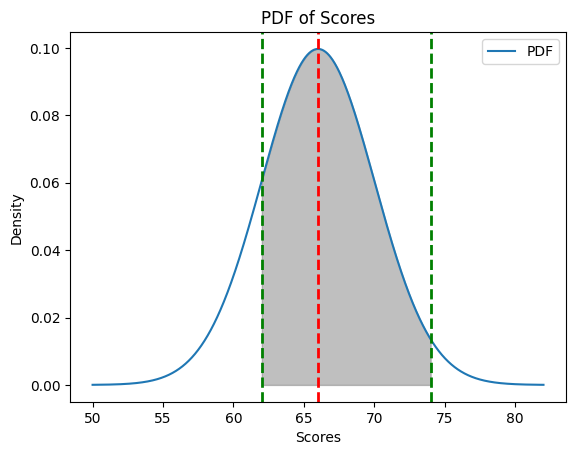

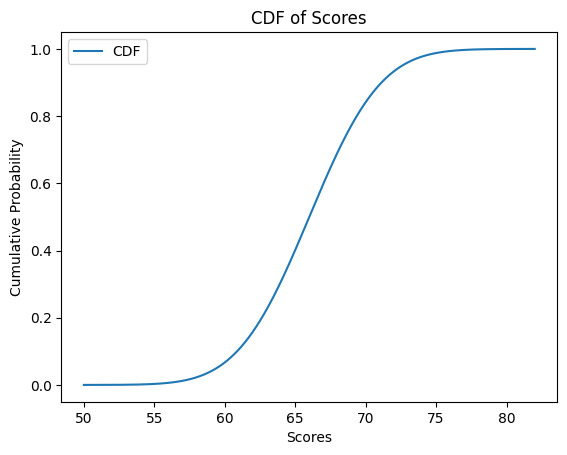

In [25]:
z = (76 - 66)/4
print(z)

#2.how many people are between 62 and 74
#draw a graph of the PDF and CDF
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

#define the mean and the standard deviation
mean = 66
std = 4
#draw the PDF
#generate the x values
x = np.linspace(mean - 4*std, mean + 4*std , 1000) #this means from the mean go 4 stdevs to the left and 4 stdevs to the right, then give me 1000 values
y = norm.pdf(x, mean, std) #get the y values for the PDF
plt.plot(x,y, label='PDF')
plt.title('PDF of Scores')
plt.xlabel('Scores')
plt.ylabel('Density')
#add a vertical line at the mean
plt.axvline(mean, color='r',linestyle='dashed', linewidth=2)
#add a vertical line at 62
plt.axvline(x=62, color ='g', linestyle='dashed', linewidth=2)
#add a vertical line at 74
plt.axvline(x=74, color ='g', linestyle='dashed', linewidth=2)
#shade the area between 62 and 74
plt.fill_between(x,y, where =((x>=62)& (x<=74)), color='gray', alpha=0.5) #alpha is the transparency of the color
plt.legend()
plt.show()

#CDF
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = norm.cdf(x, mean, std)
plt.plot(x,y, label='CDF')
plt.title('CDF of Scores')
plt.xlabel('Scores')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [20]:
#use the CDF to get the probability of the random variable being between 62 and 74
r = norm.cdf(74, mean, std) - norm.cdf(62, mean, std)
print(r*100) #output 81.85. This means that 81.85% of the people scored between 62 and 74

81.85946141203637


- In  uniform distribution each outcome is equally likely, like rolling dice
- In Poisson distribution we  represent the likelihood of a given number of successes over a given time period
- In  exponential distribution, which can be used to represent the amount of time it may take before an event occurs

# Types of Sampling
1. Random sampling - df.sample(n, random_state = 22)# random values
2. Stratified sampling- put data into groups get the samples for each group then combine the two after sampling, concatenate.
- eg divide URLS into legitimate URL, phishing URL get samples for each then concatenate the samples.
- Used with data that is classified, grouped data.
3. Cluster Sampling - involves dividing the population into clusters (groups) and then randomly selecting entire clusters. All members of the chosen clusters are included in the sample.eg group high school students into form 1, form 2, form 3 and form 4 then work with form 1 and form 2 only as the samples.

The type of sampling to use depends on the nature of the data.

# Central limit theorem

- Requires knowledge of both uniform distribution and sampling.
- Uniform distribution - eg values between 0 and 1 have equal probability of being selected hence the name uniform distribution.
- When you take 20 random samples and get their means, do the same for 30 random samples, 40, 50,60,70,80,90, 100 

then draw a histogram to represent the means, the means are normally distributed. Form the n shape.
- When you do the same for means taken from samples in exponential distribution will form a normal distribution.


- It doesn't matter which distribution our samples are from whether uniform distribution, exponential distribution, they will form a normal 
distribution.

- We can use the mean's normal distribution(histogram of the means) to form confidence intervals, do t-tests(ask whether there is a difference between 
means from two samples), and anova(difference between means from three samples).

## Rule of Thumb 
- For the Central Limit theorem to be true the sample size must be at least 30.
- EgSample 1 has  sample size of 30 meaning there are 30 x values, and sample mean is the average of the 30x's which is x-bar


* for CENTRAL LIMIT THEOREM: we assume that we will sample all the values in the population.

So the theorem explains that,
1. The means of the sample means = means of the population. 
If I do MEAN of sample 1 with 30 values, MEAN of sample 2 with 40 values, MEAN of sample 3 with 50 values, if I SUM their MEANS UP and get the MEAN of their means, then that mean will be equal to the population mean.

2. The std's of the sample means = std of the population / sqrt(sample size)
3. If the population distribution is normal then the means of the sample means will cause a normal distribution.
4. If the population distribution is not normal(exponential distribution, skewed(left skew, right skew)) but the sample size n > 30 for more than one sample

then the sampling distribution of the sample means is approximately a normal distribution for any population distribution shape.

# How to handle sampling questions for non normal distributions

In [ ]:
# given the dataframe
#1. Can check if the distribution is a normal distribution using a histogram
sns = sns.histplot(df.Age, kde=True,bins=30) #can use sns.kdeplot instead
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#2.If 1 doesn't work, try the statistical test from scipy
import scipy.stats as stats
#use the normaltest() to check if the distribution is normal. Returns a test statistic and p value.A low p-value (typically < 0.05)
#  indicates that the null hypothesis can be rejected, suggesting that the sample does not come from a normal distribution.
stat, p = stats.normaltest(df.Age) 

# since the distribution is non-normal write a function to select samples
import numpy as np

def generate_samples(data,n, seed): # data is the array of numbers, n is sample size, seed is the random seed
    np.random.seed(seed)# random seed is set to seed to select different samples from time to time
    
    #how do  I select the samples
    sample = np.random.choice(data, size= n, replace=True)# replace ensures I get different values per sample
    return sample # or pass

#create random numbers 
    data = np.random.randint(0,100,100) # 0 is the starting no, 100 is finishing no, 100 is the size of numbers

#3. write a function that gets the mean of the sample
def sample_mean(sample):
    mean = np.mean(sample)
    return mean

#4. write a function that gets the distribution of the sample means
def sample_means_distribution(data, dist_size=100,n= 30): #data is the array of numbers, n is sample size, seed is the random seed, samples is the number of samples
    sample_means = []
    for i in range(dist_size):
        sample = generate_samples(data, n, seed=i) #seed is set to i so that I get different samples every time I run the code
        mean = sample_mean(sample)
        sample_means.append(mean)
    return sample_means
data = np.random.randint(0,100,100) # 0 is the starting no, 100 is finishing no, 100 is the size of numbers

# THE ABOVE FUNCTIONS MAKE THE DISTRIBUTION NORMAL AS LONG AS N IS GREATER THAN 30



    


# Sampling Statistics
-  Calculate and interpret sampling error
- Explain how sample size is related to sampling error
- Explain how the sampling error is related to population standard deviation. To get the sampling error =  np.std(means(this is std of population))/np.sqrt(sample_size)
- SAMPLING ERROR - basically $\sigma$ of a sample given by 
$\sigma$ sample = $\sigma$ population / np.sqrt(sample_size)

{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}


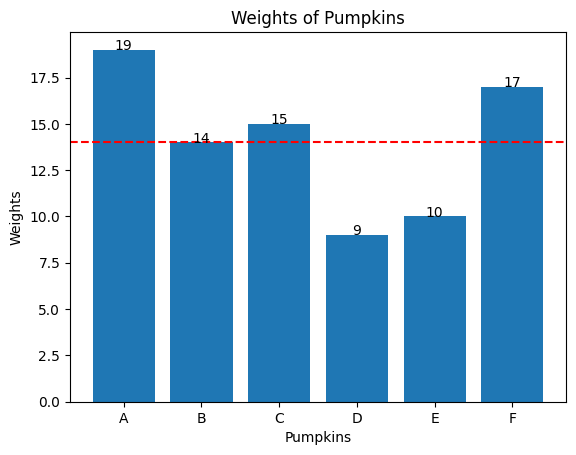

In [28]:
"""""
Pumpkin Weights

The population is the weight of six pumpkins (in pounds) displayed in a carnival "Guess the Weight" game booth. You are asked to guess the average weight of the six pumpkins by picking two pumpkins at a time randomly until all pumpkins have been used.

Pumpkin	Weight (in pounds)
A	19
B	14
C	15
D	9
E	10
F	17
"""
# Import necessary libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools

# Create two lists with pumpkin names and weights

pumpkin = ['A', 'B', 'C', 'D', 'E', 'F']
weights = [19,14,15,9,10,17]

# Combine both lists to create a dictionary

pumpkin_dict = dict(zip(pumpkin,weights))


print (pumpkin_dict)

#{'A': 19, 'B': 14, 'C': 15, 'D': 9, 'E': 10, 'F': 17}

def calculate_mu(x):

    # Use the formula for mu given above
   d = sum(x.values())/ len(x.values())

   return (d)   

mu = calculate_mu(pumpkin_dict)
mu

# Plot a bar graph showing weights of pumpkins and highlight the mean weight
mean = np.mean(list(pumpkin_dict.values()))
plt.bar(pumpkin_dict.keys(), pumpkin_dict.values())
plt.xlabel('Pumpkins')
plt.ylabel('Weights')
plt.title('Weights of Pumpkins')
for i,value in enumerate(pumpkin_dict.values()):
 plt.text(i, value, str(value), ha='center')
plt.axhline(mean, linestyle='--',color='r', label=f'Mean:{mean}')


## Mean of Samples
- Get different possible combinations based on sample sizes then get their means

In [29]:
# Identify a sample size n 
n = 2

# Use itertools.combinations() to generate and print a list of combinations
combs = itertools.combinations(pumpkin_dict.keys(),n)

for item in combs:
    print(item)

def sample_means(sample_size, data):

    """
    This function takes in population data as a dictionary along with a chosen sample size 
    to generate all possible combinations of given sample size. 
    The function calculates the mean of each sample and returns:
    a) a list of all combinations ( as tuples ) 
    b) a list of means for all sample
    """

    n = sample_size

    # Calculate the mean of population
    mu = sum(data.values()) / len(data.values())
    
    #print ("Mean of population is:", mu)
    print(f'Mean of population is: {mu}')

    # Generate all possible combinations using given sample size
    combs = list(itertools.combinations(data.keys(), n))
    

    # Calculate the mean weight (x_bar) for all the combinations (samples) using the given data
    x_bar_list = []
    for comb in combs:
        mean = sum(data[key] for key in comb) / n
        x_bar_list.append(mean)
    
    # Calculate sample mean for all combinations and append to x_bar_list
    return combs, x_bar_list

n = 2 #Sample size

combs, means = sample_means(n, pumpkin_dict)
# Print the sample combinations with their means
print("Sample combinations and their means:")
for comb, mean in zip(combs, means):
    print(f"{comb}: {mean}")



# Using 2 samples, we can see 15 possible combinations as below:
# The mean of all sample means mu_x_hat is: 14.0
# ('A', 'B') 16.5
# ('A', 'C') 17.0
# ('A', 'D') 14.0
# ('A', 'E') 14.5
# ('A', 'F') 18.0
# ('B', 'C') 14.5
# ('B', 'D') 11.5
# ('B', 'E') 12.0
# ('B', 'F') 15.5
# ('C', 'D') 12.0
# ('C', 'E') 12.5
# ('C', 'F') 16.0
# ('D', 'E') 9.5
# ('D', 'F') 13.0
# ('E', 'F') 13.5
# The mean of all sample means mu_x_hat is: 14.0

('A', 'B')
('A', 'C')
('A', 'D')
('A', 'E')
('A', 'F')
('B', 'C')
('B', 'D')
('B', 'E')
('B', 'F')
('C', 'D')
('C', 'E')
('C', 'F')
('D', 'E')
('D', 'F')
('E', 'F')
Mean of population is: 14.0
Sample combinations and their means:
('A', 'B'): 16.5
('A', 'C'): 17.0
('A', 'D'): 14.0
('A', 'E'): 14.5
('A', 'F'): 18.0
('B', 'C'): 14.5
('B', 'D'): 11.5
('B', 'E'): 12.0
('B', 'F'): 15.5
('C', 'D'): 12.0
('C', 'E'): 12.5
('C', 'F'): 16.0
('D', 'E'): 9.5
('D', 'F'): 13.0
('E', 'F'): 13.5


## We can develop a frequency table to identify the probability of seeing a different mean value.

In [30]:
def calculate_probability(means):
    '''
    Input: a list of means (x_hats)
    Output: a list of probablitity of each mean value
    '''
    #Calculate the frequency of each mean value
    #use the Counter function
    freq = Counter(means)
    total = len(means)

    prob = []
    for mean in means:
        probability = freq[mean] / total
        prob.append(probability)

    # Calculate and append frequency of each mean value in the prob list. 

    return prob
    
probs = calculate_probability(means)

# Print combinations with sample means and probability of each mean value
for comb, mean, prob in zip(combs, means, probs):
    print(f"{comb}: {mean}, Probability: {prob}")


# ('A', 'B') 16.5 1/15
# ('A', 'C') 17.0 1/15
# ('A', 'D') 14.0 1/15
# ('A', 'E') 14.5 2/15
# ('A', 'F') 18.0 1/15
# ('B', 'C') 14.5 2/15
# ('B', 'D') 11.5 1/15
# ('B', 'E') 12.0 2/15
# ('B', 'F') 15.5 1/15
# ('C', 'D') 12.0 2/15
# ('C', 'E') 12.5 1/15
# ('C', 'F') 16.0 1/15
# ('D', 'E') 9.5 1/15
# ('D', 'F') 13.0 1/15
# ('E', 'F') 13.5 1/15

('A', 'B'): 16.5, Probability: 0.06666666666666667
('A', 'C'): 17.0, Probability: 0.06666666666666667
('A', 'D'): 14.0, Probability: 0.06666666666666667
('A', 'E'): 14.5, Probability: 0.13333333333333333
('A', 'F'): 18.0, Probability: 0.06666666666666667
('B', 'C'): 14.5, Probability: 0.13333333333333333
('B', 'D'): 11.5, Probability: 0.06666666666666667
('B', 'E'): 12.0, Probability: 0.13333333333333333
('B', 'F'): 15.5, Probability: 0.06666666666666667
('C', 'D'): 12.0, Probability: 0.13333333333333333
('C', 'E'): 12.5, Probability: 0.06666666666666667
('C', 'F'): 16.0, Probability: 0.06666666666666667
('D', 'E'): 9.5, Probability: 0.06666666666666667
('D', 'F'): 13.0, Probability: 0.06666666666666667
('E', 'F'): 13.5, Probability: 0.06666666666666667


## Sample size and sample error
- Let's repeat the above exercise while increasing the sample size from 2 to 5.

In [33]:
n = 5
combs, means = sample_means(n, pumpkin_dict)
probs = calculate_probability(means)    
for comb, mean, probs in zip(combs, means, probs):
    print(f"{comb}: {mean}, Probability: {probs}")

Mean of population is: 14.0
('A', 'B', 'C', 'D', 'E'): 13.4, Probability: 0.16666666666666666
('A', 'B', 'C', 'D', 'F'): 14.8, Probability: 0.16666666666666666
('A', 'B', 'C', 'E', 'F'): 15.0, Probability: 0.16666666666666666
('A', 'B', 'D', 'E', 'F'): 13.8, Probability: 0.16666666666666666
('A', 'C', 'D', 'E', 'F'): 14.0, Probability: 0.16666666666666666
('B', 'C', 'D', 'E', 'F'): 13.0, Probability: 0.16666666666666666


Mean of population is: 14.0
Mean of population is: 14.0
Mean of population is: 14.0
Mean of population is: 14.0
Mean of population is: 14.0


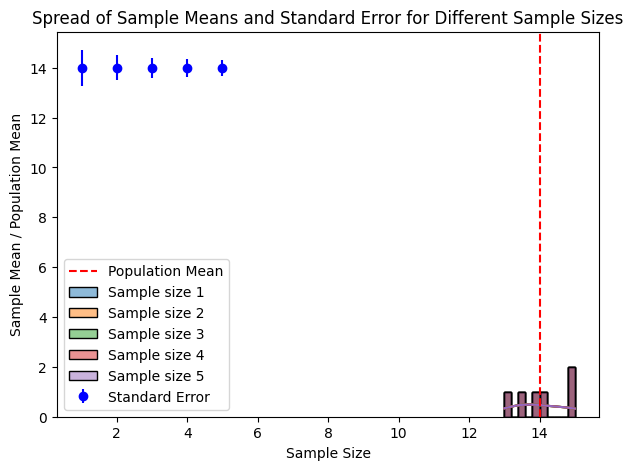

In [35]:
# Create empty lists for storing sample means, combinations and standard error for each iteration
means_list = []
combs_list = []
err_list = []
# Create a for loop with changing sample sizes
sample_sizes = range(1,6)
for i in sample_sizes:
     # Calculate combinations, means as earlier, append to relevant lists
    combs, means = sample_means(n, pumpkin_dict)
    means_list.append(means)
    combs_list.append(combs)
    # Calculate and append the standard error by dividing sample means with square root of sample size
    error = np.std(means)/np.sqrt(i)
    err_list.append(error)

    

    # Visualize sample spread and standard error values for each sample
    # Visualize sample spread and standard error values for each sample size
plt.figure(figsize=(7, 5))
for i, means in enumerate(means_list):
    sns.histplot(means, kde=True, label=f'Sample size {i+1}', bins=10)
plt.axvline(x=np.mean(list(pumpkin_dict.values())), color='r', linestyle='--', label='Population Mean')
plt.errorbar(sample_sizes, [np.mean(means) for means in means_list], yerr=err_list, fmt='o', color='b', label='Standard Error')
plt.title('Spread of Sample Means and Standard Error for Different Sample Sizes')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean / Population Mean')
plt.legend()
plt.show()


# Confidence Intervals
- sample data distribution - the distribution of the data points within a single sample.
-  A sampling distribution - the probability distribution a statistic can take.
- Central Limit Theorem, the sampling distribution of the sample mean (x_hat) is approximately normal regardless of the shape of the original distribution of the variable.

- range of values above and below the point estimate that captures the true population parameter at some predetermined confidence level. 
- Margin of Error = z ∗ (σ / √n)
- The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level.

- IF CONFIDENCE INTERVAL IS 95 % IT MEANS If we pulled 100 samples and constructed confidence intervals in the same manner, we would expect that 95 of the intervals would contain the true mean of population age.

In [37]:
"""
If we want our confidence level — i.e., how confident we are that the true value of the parameter lies within the confidence interval — to be:

90%: The z-score multiplier should be z = 1.645, because 90% of the area under the 
 normal distribution lies between -1.645 and 1.645.
95%: The z-score multiplier should be z = 1.96, because 95% of the area under the 
 normal distribution lies between -1.96 and 1.96.
99%: The z-score multiplier should be z = 2.575, because 99% of the area under the 
 normal distribution lies between -2.575 and 2.575.

 It is more suitable to get z-critical values with stats.norm.ppf() as the results are more accurate.

stats.norm.ppf(q, loc=0, scale=1) is a percent point function (inverse of cdf — percentiles). q = percentile, loc = the mean, and scale = the standard deviation.
doing this
mean = np.mean(sample)
std = np.std(sample)
z_score = stats.norm.ppf(0.795, loc=mean, scale=std)  # Using the calculated mean and standard deviation
or 
stats.norm.ppf(0.975) for a 95% confidence interval. Doing this 
mean = np.mean(sample)
z_score = stats.norm.ppf(0.795)  # Using the default mean=0 and standard deviation=1
std = np.std(sample)

"""
#to get the confidence interval
import scipy.stats as stats
#calculate the 
# 1.mean 
# 2.  z-score 
# 3. standard deviation 
# 4. margin of error  = z*(std/sqrt(n))
# 5. confidence intervals = mean - margin of error, mean + margin of error

def conf_interval(pop, sample):
    '''
    Function input: population , sample 
    Function output: z-critical, Margin of error, Confidence interval
    '''
    sample_size = 500
    n = len(sample)
    x_hat = sample.mean()

    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.norm.ppf(q = 0.975) to get the desired z-critical value 
    # instead of q = 0.95 because the distribution has two tails.
    z_score = stats.norm.ppf(0.975)  #  z-critical value for 95% confidence

    #Calculate the population std from data
    pop_stdev = np.std(sample)

    # Calculate the margin of error using formula given above
    margin_of_error = z_score * (pop_stdev / np.sqrt(n)) #z*std/sqrt(n) 

    # Calculate the confidence interval by applying margin of error to sample mean 
    # (mean - margin of error, mean+ margin of error)
    confidence_interval = (x_hat -  margin_of_error, x_hat + margin_of_error)
    
    return z,  margin_of_error, confidence_interval

# Call above function with sample and population 
z_critical, margin_of_error, confidence_interval = conf_interval(population_ages, sample)    
    
# print("z-critical value:")       
print("z-critical value:",z_critical)                
# print ('\nMargin of error')
print('\nMargin of error:', margin_of_error)
# print("\nConfidence interval:")
print("\nConfidence interval:", confidence_interval)



# T DISTRIBUTION
- Requires 4 things
1. The sample mean
2. The sample standard deviation
3. The degrees of freedom (n - 1 ). makes the shape of the t-distribution. As degrees of freedom increase the more it approaches a normal distribution.
4. The confidence level we wish to have in our estimate


- We use normal distribution if we have the population std and sample_size > 30 
- T distribution is used when we don't have population std and sample_size is less than 30 to CALCULATE MEAN, CONFIDENCE INTERVALS. Has heavier tails than normal
    distribution thus calculation of $\alpha$ = which is  both right and left tail, 

- Due to it's thicker tails, it's more than capable of producing values further away from the mean

In [ ]:
"""
1.Calculate the sample mean and standard deviation.
2. Determine the degrees of freedom.
3. Find the appropriate t-score for your confidence level and degrees of freedom.
4. Calculate the margin of error using the t-score.
5.Construct the confidence interval for the sample mean.
"""
#use the scipy.stats.t module
import scipy.stats as stats
import numpy as np

#1. calculate mean and std of the sample if n<30
mean = np.mean(sample)
std = np.std(sample, ddof=1) #ddof is(Bessels correction) the degrees of freedom. ddof=1 is used to correct the bias in the estimation of the population variance. 
# so thus variance will be divided by n-1 when estimating the population std

#2. degrees of freedom 
dof  = n-1 # no of samples - 1. dof is the degree of freedom

#confidence level, alpha
confidence_level = 0.95 #95% confidence interval
alpha = 1 - confidence_level
alpha/2 = 1 - 0.95/2 # for either the left or right tail

#3. find the t-score for the confidence level and degrees of freedom
t_score = stats.t.ppf(0.975, dof) #0.975 is used to get the t-score for a 95% confidence interval. dof is the degrees of freedom
#or 
t_score = stats.t.ppf(1 - alpha/2, dof) #1- alpha/2 is used to get the t-score for a 95% confidence interval. dof is the degrees of freedom

#standard error 
se = std(sample, ddof=1)/np.sqrt(n) #std/sqrt(n) standard error. ddof reduces biasness in the estimation of the population variance

#4. MARGIN of error
margin_of_error = t_score * (std/np.sqrt(n)) #t*std/sqrt(n) margin_of_error 
#or
margin_of_error = t_score * se

#5. confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)


## USING stat.t.interval- calculcate the confidence interval direct


In [ ]:
# Replace None with appropriate code

def conf_interval(sample):
    '''
    Input:  Sample data
    Output: Confidence interval for the mean of the
            population that the sample was drawn from
    '''
    
    # Sample size
    n = len(sample)
    # Sample mean
    x_hat = sample.mean()
    
    # Standard error of the mean
    standard_error = np.std(sample, ddof=1)/np.sqrt(n)
    #degrees of freedom 
    df = n-1
    confidence_level = 0.95
    
    # Compute confidence interval with stats.t.interval
    conf = stats.t.interval( confidence_level, df, loc= x_hat, scale= standard_error)
    
    return conf

# Confirm that this produces the same interval as the previous code
conf_interval(sample)

# (18.431843086289952, 21.309734172653762)